In [42]:
from pandas_datareader import data
import pandas as pd
# pd.set_option('display.width', 1000)

start_date = '2016-01-01'
end_date = '2021-07-31'
goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)

print(goog_data)


                   High          Low         Open        Close   Volume    Adj Close
Date                                                                                
2016-01-04   744.059998   731.257996   743.000000   741.840027  3272800   741.840027
2016-01-05   752.000000   738.640015   746.450012   742.580017  1950700   742.580017
2016-01-06   747.179993   728.919983   730.000000   743.619995  1947000   743.619995
2016-01-07   738.500000   719.059998   730.309998   726.390015  2963700   726.390015
2016-01-08   733.229980   713.000000   731.450012   714.469971  2450900   714.469971
...                 ...          ...          ...          ...      ...          ...
2021-07-26  2794.260010  2753.020020  2765.000000  2792.889893  1152600  2792.889893
2021-07-27  2800.219971  2702.000000  2800.219971  2735.929932  2108200  2735.929932
2021-07-28  2793.520020  2727.000000  2771.239990  2727.629883  2734400  2727.629883
2021-07-29  2743.030029  2722.760010  2727.612061  2730.810059   

In [43]:
goog_data_signal = pd.DataFrame(index=goog_data.index)
print(goog_data_signal)

Empty DataFrame
Columns: []
Index: [2016-01-04 00:00:00, 2016-01-05 00:00:00, 2016-01-06 00:00:00, 2016-01-07 00:00:00, 2016-01-08 00:00:00, 2016-01-11 00:00:00, 2016-01-12 00:00:00, 2016-01-13 00:00:00, 2016-01-14 00:00:00, 2016-01-15 00:00:00, 2016-01-19 00:00:00, 2016-01-20 00:00:00, 2016-01-21 00:00:00, 2016-01-22 00:00:00, 2016-01-25 00:00:00, 2016-01-26 00:00:00, 2016-01-27 00:00:00, 2016-01-28 00:00:00, 2016-01-29 00:00:00, 2016-02-01 00:00:00, 2016-02-02 00:00:00, 2016-02-03 00:00:00, 2016-02-04 00:00:00, 2016-02-05 00:00:00, 2016-02-08 00:00:00, 2016-02-09 00:00:00, 2016-02-10 00:00:00, 2016-02-11 00:00:00, 2016-02-12 00:00:00, 2016-02-16 00:00:00, 2016-02-17 00:00:00, 2016-02-18 00:00:00, 2016-02-19 00:00:00, 2016-02-22 00:00:00, 2016-02-23 00:00:00, 2016-02-24 00:00:00, 2016-02-25 00:00:00, 2016-02-26 00:00:00, 2016-02-29 00:00:00, 2016-03-01 00:00:00, 2016-03-02 00:00:00, 2016-03-03 00:00:00, 2016-03-04 00:00:00, 2016-03-07 00:00:00, 2016-03-08 00:00:00, 2016-03-09 00:00:00

In [44]:
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal['daily difference'] = goog_data_signal['price'].diff()

print(goog_data_signal)

                  price  daily difference
Date                                     
2016-01-04   741.840027               NaN
2016-01-05   742.580017          0.739990
2016-01-06   743.619995          1.039978
2016-01-07   726.390015        -17.229980
2016-01-08   714.469971        -11.920044
...                 ...               ...
2021-07-26  2792.889893         36.569824
2021-07-27  2735.929932        -56.959961
2021-07-28  2727.629883         -8.300049
2021-07-29  2730.810059          3.180176
2021-07-30  2704.419922        -26.390137

[1404 rows x 2 columns]


In [45]:
import numpy as np

goog_data_signal['signal'] = 0.0
goog_data_signal['signal'] = np.where(goog_data_signal['daily difference'] > 0, 1.0, 0.0)

print(goog_data_signal)


                  price  daily difference  signal
Date                                             
2016-01-04   741.840027               NaN     0.0
2016-01-05   742.580017          0.739990     1.0
2016-01-06   743.619995          1.039978     1.0
2016-01-07   726.390015        -17.229980     0.0
2016-01-08   714.469971        -11.920044     0.0
...                 ...               ...     ...
2021-07-26  2792.889893         36.569824     1.0
2021-07-27  2735.929932        -56.959961     0.0
2021-07-28  2727.629883         -8.300049     0.0
2021-07-29  2730.810059          3.180176     1.0
2021-07-30  2704.419922        -26.390137     0.0

[1404 rows x 3 columns]


In [46]:
goog_data_signal['positions'] = goog_data_signal['signal'].diff()
print(goog_data_signal.head(10))

                 price  daily difference  signal  positions
Date                                                       
2016-01-04  741.840027               NaN     0.0        NaN
2016-01-05  742.580017          0.739990     1.0        1.0
2016-01-06  743.619995          1.039978     1.0        0.0
2016-01-07  726.390015        -17.229980     0.0       -1.0
2016-01-08  714.469971        -11.920044     0.0        0.0
2016-01-11  716.030029          1.560059     1.0        1.0
2016-01-12  726.070007         10.039978     1.0        0.0
2016-01-13  700.559998        -25.510010     0.0       -1.0
2016-01-14  714.719971         14.159973     1.0        1.0
2016-01-15  694.450012        -20.269958     0.0       -1.0


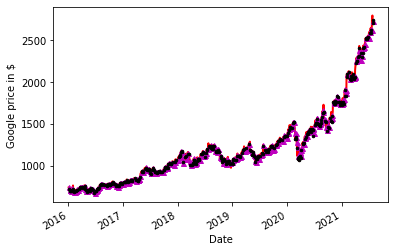

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2)

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index,
         goog_data_signal.price[goog_data_signal.positions == 1.0], '^', markersize=5, color='m')

ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index,
         goog_data_signal.price[goog_data_signal.positions == -1.0], '.', markersize=5, color='k')



<AxesSubplot:xlabel='Date'>

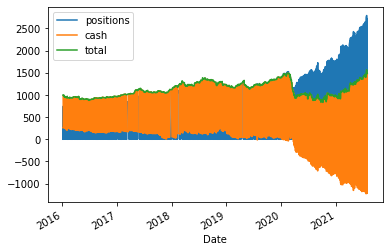

In [48]:
initial_capital = float(1000.0)
positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)

positions['GOOG'] = goog_data_signal['signal']

portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']


<AxesSubplot:xlabel='Date'>

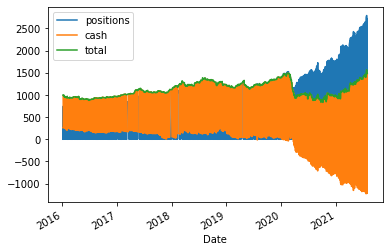

In [50]:
portfolio.plot()